In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2025-03-26 13:10:20.051679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Incarcare set de date
data=np.loadtxt("rezultate_fepe_sortate.csv", delimiter=",")
x=data[:, :2]  # sunt selectate toate liniile si numai primele doua coloane
y=data[:, 2]  # sunt selectate toate liniile si numai a treia coloana

In [3]:
# Normarea datelor
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

# Splitarea datelor
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)  # 20% dintre date (0.2) merg in setul de test si restul raman pentru antrenare

# Salvare scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [5]:
# Definirea RETELEI NEURONALE
model=keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(x.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="linear")  # 1 output neuron
])

In [6]:
# Compilarea modelului
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [7]:
# Antrenarea modelului
history=model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - mae: 0.0298 - val_loss: 0.0022 - val_mae: 0.0196
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0134 - val_loss: 0.0011 - val_mae: 0.0114
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9296e-04 - mae: 0.0084 - val_loss: 6.0284e-04 - val_mae: 0.0095
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4831e-04 - mae: 0.0092 - val_loss: 4.2791e-04 - val_mae: 0.0077
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5533e-04 - mae: 0.0067 - val_loss: 2.3626e-04 - val_mae: 0.0058
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6784e-04 - mae: 0.0062 - val_loss: 2.0045e-04 - val_mae: 0.0051
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0618e-04 - mae: 0.0055 - val_loss: 1.2151e-04 - val_mae: 0.0047
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2990e-04 - mae: 0.0046 - val_loss: 9.9113e-05 - val_mae: 0.0042
Epoch 9/100
30/

In [8]:
# Evaluarea modelului
loss, mae=model.evaluate(x_test, y_test)
print(f"Test MAE: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3113e-06 - mae: 0.0013
Test MAE: 0.0011469039600342512


In [9]:
# Salvarea modelului in directory-ul curent
model.save("germanium_fepe_nn.keras")

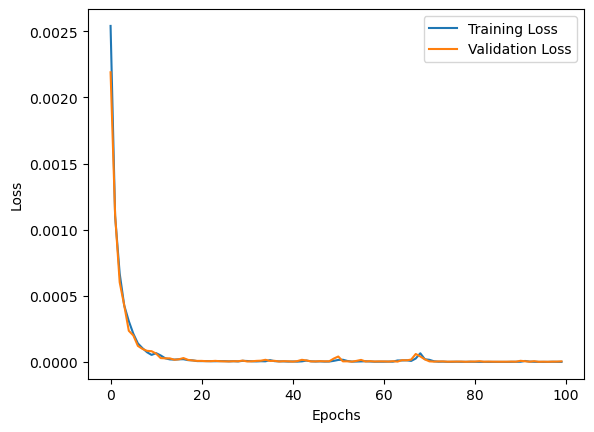

In [10]:
# Plotarea curbelor de invatare
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
# Date noi pentru a prezice rezultatul (distanta [cm], energia [keV])
new_data = np.array([[5, 500]])
# Scalare date noi
new_data_scaled = scaler.transform(new_data)
# Predictie model
prediction = model.predict(new_data_scaled)
print("FEPE predicted:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
FEPE predicted: 0.010884356
